In [ ]:
# I choose project three because i have completed few recommendation projects before in college. i have created a recommendation based on amazon datased

In [1]:
#Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [3]:
amazon_ratings = pd.read_csv("C:/Users/dharn/Downloads/archive (10)/ratings_Beauty.csv")
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
amazon_ratings.shape


(2023070, 4)

In [5]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

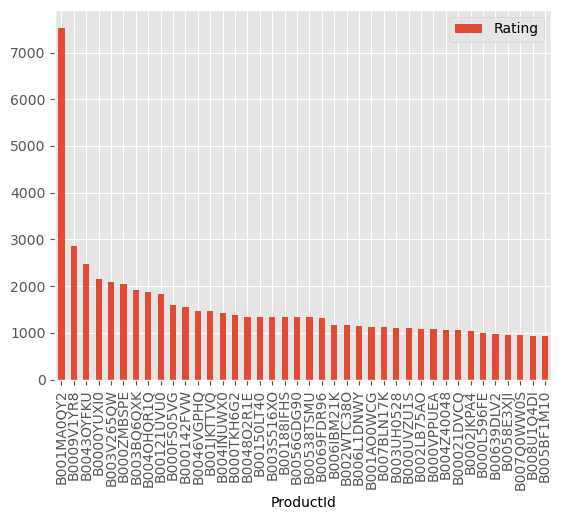

In [10]:
most_popular.head(40).plot(kind = "bar")

In [11]:
#from the above graph we can identify the most popular products


In [12]:
#so I am going to recommend the products based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

In [13]:
amazon_ratings1 = amazon_ratings.head(10000)

In [14]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#in the above list the unknown value is denoted by 0

In [17]:
ratings_utility_matrix.shape

(9697, 886)

In [18]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X.shape

(886, 9697)

In [20]:
X1 = X

In [21]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [22]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [24]:
X.index[105]


'6165290582'

In [25]:
#lets check the product id values

In [26]:
i = "6165290582"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

105

In [27]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [28]:
# So we will create a top 5 recommendation system

In [30]:
Recommend = list(X.index[correlation_product_ID > 0.93])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:5]

['0558925278', '1304622622', '322700075X', '3227001055', '4057362894']

In [31]:
#So these are the top 5 liked products which are good for recommendation based on rating over 0.93

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn import svm
from sklearn.metrics import adjusted_rand_score

In [33]:
#The product recommendations can be based on textual clustering analysis given in product description.I have used SVM classifier which is good for classification for this project

In [34]:
product_descriptions = pd.read_csv("C:/Users/dharn/Downloads/attributes.csv/attributes.csv")
product_descriptions.shape

(2044803, 3)

In [35]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [38]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["value"].head(10)

0    Versatile connector for various 90° connection...
1    Stronger than angled nailing or screw fastenin...
2    Help ensure joints are consistently straight a...
3                Dimensions: 3 in. x 3 in. x 1-1/2 in.
4                             Made from 12-Gauge steel
5            Galvanized for extra corrosion resistance
6    Install with 10d common nails or #9 x 1-1/2 in...
7                                                   12
8                                     Galvanized Steel
9                                   Simpson Strong-Tie
Name: value, dtype: object

In [39]:
#we have extracted the features from the product and stored it separately 
#we have to Convert the text in product description into numerical data for analysis

In [41]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["value"])
X1

<500x874 sparse matrix of type '<class 'numpy.float64'>'
	with 1402 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.cluster import KMeans

C:\Users\dharn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


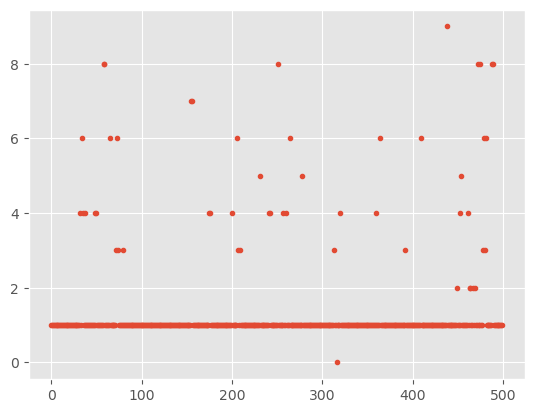

In [50]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [51]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [52]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [54]:
true_k = 15

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 warning
 cords
 alternatives
 strangulation
 present
 child
 access
 hazard
 consider
 potential
Cluster 1:
 72
 96
 drive
 electrical
 efficient
 edgings
 edging
 easy
 easily
 ease
Cluster 2:
 25
 10
 33
 zip
 durable
 electroluminescence
 electrical
 efficient
 edgings
 edging
Cluster 3:
 96
 black
 36
 resistant
 18
 bamboo
 metal
 easy
 wall
 375
Cluster 4:
 white
 color
 zip
 dual
 electrical
 efficient
 edgings
 edging
 easy
 easily
Cluster 5:
 tall
 diameter
 size
 75
 25
 zip
 easily
 dust
 duty
 ease
Cluster 6:
 rectangle
 drive
 electrical
 efficient
 edgings
 edging
 easy
 easily
 ease
 duty
Cluster 7:
 low
 maintenance
 clean
 easy
 zip
 efficient
 edgings
 edging
 easily
 ease
Cluster 8:
 yes
 zip
 drive
 electrical
 efficient
 edgings
 edging
 easy
 easily
 ease
Cluster 9:
 75
 25
 dual
 electroluminescence
 electrical
 efficient
 edgings
 edging
 easy
 easily
Cluster 10:
 90
 zip
 drive
 electrical
 efficient
 edgings
 edging
 easy
 ea

In [55]:
#Now implementing it with SVM

In [71]:
import numpy as np
from sklearn import svm

# Assuming 'x' should have 500 samples, each with 1 feature
# You need to reshape or expand 'x' to match the shape accordingly
x = np.random.rand(500, 1)  # Example data with 500 samples and 1 feature

# Assuming 'y' is an array of labels for 500 samples
y = np.random.randint(0, 2, size=500)  # Example labels (0 or 1) for 500 samples

# Fit SVM classifier
clf = svm.SVC()
clf.fit(x, y)


SVC()

In [69]:
x = np.array(true_k).reshape(-1, 1)

print(true_k_array)

[[15]]


In [66]:
y=y_kmeans.reshape(-1,1)

In [72]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [75]:
show_recommendations("pencil")

Cluster 3:
 96
 black
 36
 resistant
 18
 bamboo
 metal
 easy
 wall
 375


In [76]:
n=input("enter the keyword")
print(show_recommendations(n))

enter the keywordpaint
Cluster 3:
 96
 black
 36
 resistant
 18
 bamboo
 metal
 easy
 wall
 375
None


In [ ]:
# Finally a recommendation system has been built for b2b process.